In [19]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#reading the data
data = pd.read_csv('SMSSpamCollection',sep = '\t')
data.columns = ['label','text']
data.head()

,label,text
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


<AxesSubplot:>

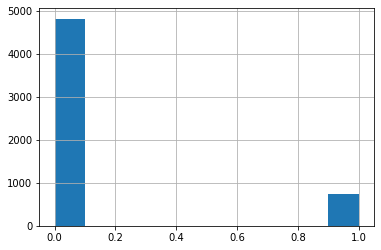

In [20]:
data['label'].hist()

In [7]:
#spam = 1 , ham = 0
data['label'].replace('spam',1,inplace = True)
data['label'].replace('ham',0,inplace = True)
data.head()

,label,text
0,0,Ok lar... Joking wif u oni...
1,1,Free entry in 2 a wkly comp to win FA Cup fina...
2,0,U dun say so early hor... U c already then say...
3,0,"Nah I don't think he goes to usf, he lives aro..."
4,1,FreeMsg Hey there darling it's been 3 week's n...


In [9]:
#for cleaing text
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [10]:
#creating objects
lemmatizer = WordNetLemmatizer()

In [16]:
# pre-processing text
corpus = []
#for each text
for sentence in data['text']:
    #lowercase
    text = sentence.lower()
    #remove commas,full stops etc
    text = re.sub('[^a-zA-Z]',' ',sentence)
    #remove stop words and lemmatize 
    words = nltk.word_tokenize(text)
    text = " ".join([lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))])
    corpus.append(text)

In [17]:
corpus[0:5]

['Ok lar Joking wif u oni',
 'Free entry wkly comp win FA Cup final tkts st May Text FA receive entry question std txt rate T C apply',
 'U dun say early hor U c already say',
 'Nah I think go usf life around though',
 'FreeMsg Hey darling week word back I like fun still Tb ok XxX std chgs send rcv']

In [36]:
#convert corpus to tfidf vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 5000)
vectors = tfidf.fit_transform(corpus).toarray()
vectors.shape

(5571, 5000)

In [37]:
#train,test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(vectors,data['label'],test_size = 0.2)

In [39]:
#applying Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [40]:
#predictions
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [41]:
from sklearn.metrics import accuracy_score

print("Train accuracy: {}".format(accuracy_score(y_pred_train,y_train)))
print("Test accuracy: {}".format(accuracy_score(y_pred_test,y_test)))

Train accuracy: 0.979802513464991
Test accuracy: 0.9757847533632287
